In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("placement.csv")
df.sample(5)

,cgpa,package
63,9.16,4.25
5,7.89,2.99
152,7.37,3.08
115,8.35,4.21
73,8.44,4.03


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


<Axes: xlabel='cgpa', ylabel='package'>

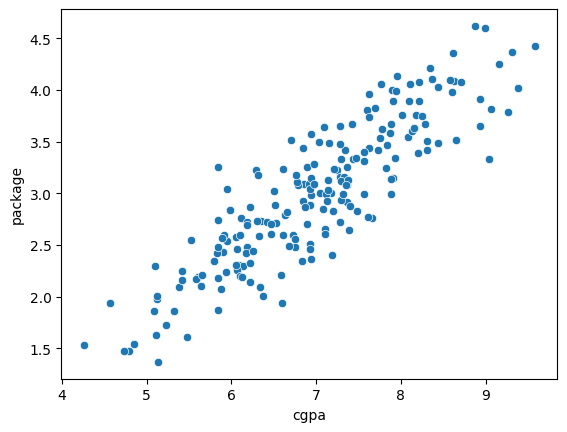

In [61]:
sns.scatterplot(x='cgpa', y='package', data=df)

In [62]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [64]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [65]:
LR_model.fit(X_train.reshape(-1, 1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


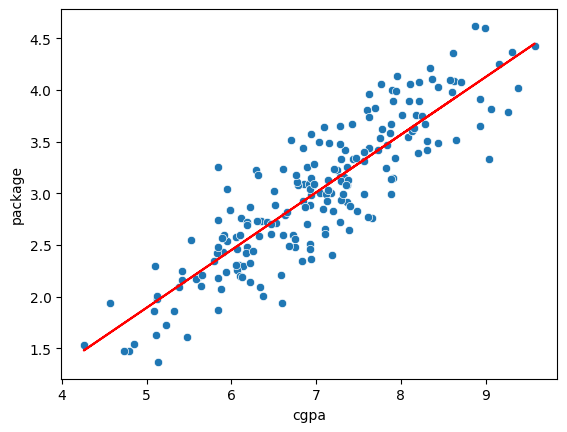

In [66]:
sns.scatterplot(x='cgpa', y='package', data=df)
plt.plot(X_train, LR_model.predict(X_train.reshape(-1, 1)), color='red', label='Training Fit')

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
y_pred = LR_model.predict(X_test.reshape(-1, 1))

In [69]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.2884710931878175
Mean Squared Error: 0.12129235313495527
R-squared: 0.780730147510384


In [70]:
print("RSME", np.sqrt(mean_squared_error(y_test, y_pred)))

RSME 0.34827051717731616


In [71]:
X_test.shape

(40,)

In [72]:
print("Adjusted R-squared:", 1 - ((1- r2_score(y_test, y_pred)) * (((X_test[0]) - 1) / ((X_test[0]) - 1 - 1))))

Adjusted R-squared: 0.7474064617216887


In [103]:
# to show how r2 score is bad when you increase the number of features
# and we need 

new_df1 = df.copy()
new_df1['random ass value'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random ass value','package']]
new_df1.head()

,cgpa,random ass value,package
0,6.89,0.693600,3.26
1,5.12,0.104579,1.98
2,7.82,0.944375,3.25
3,7.42,0.653121,3.67
4,6.94,0.670073,3.57


<Axes: xlabel='cgpa', ylabel='random ass value'>

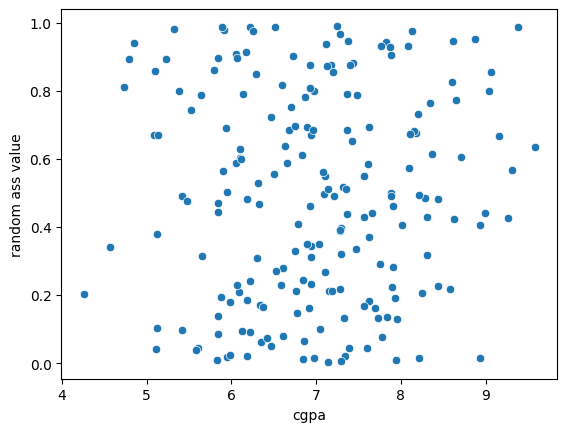

In [104]:
sns.scatterplot(x='cgpa', y='random ass value', data=new_df1)

In [105]:
X = new_df1.iloc[:, :2].values
y = new_df1.iloc[:, -1].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [107]:
lr = LinearRegression()

In [108]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
y_pred = lr.predict(X_test)

In [110]:
print("R squared score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R squared score 0.7824634631947305


In [111]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7707047314755268

In [113]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [114]:
new_df2.sample(5)

,cgpa,iq,package
159,8.71,3.78,4.08
19,7.48,2.63,2.83
102,5.13,1.47,1.37
43,7.66,3.66,2.76
139,7.19,2.40,2.40


Text(0, 0.5, 'Package(in lpa)')

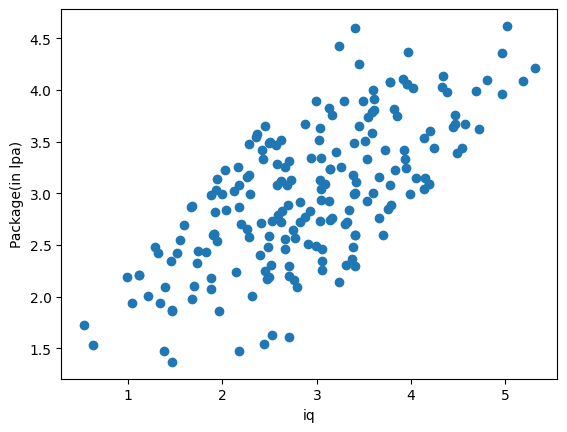

In [115]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')